# CSE4212: Artificail Intelligence Lab
### **Date:** 2 March, 2024

## Group 2:

- Nazmus Shakib

  **ID:** 1910876105

  **Session:** 2018-19

- Md. Ahanaf Arif Khan
  
  **ID:** 1910676110

  **Session:** 2018-19

- Farjana Aktar,

  **ID:** 1912276145

  **Session:** 2018-19

- Mohammad Ashif,

  **ID:** 1711076147

  **Session:** 2016-17



# Assignment4 (Group-wise submission)
Write a report on your binary classifier trained and tested using your private data collected by your mobile-phone cameras/conventional cameras/ laptop web cameras. Report should be submitted in PDF format prepared by Latex.

Report should include as many analysis as possible about the results, procedure of tuning hyper-parameters to get better results.

In order to avoid same image classes, groups are requested to entry their image class in the following sheet:
https://docs.google.com/spreadsheets/d/1Ul_UZ306WAcCpnY2pwcs0C1JLrV-iNkuKSWGX1GXAjQ/edit?usp=sharing
Each group needs to collect at least 400 images per class.

Group need to build, train and test both a fully connected neural network-based binary classifier and convolutional neural network based binary classifier.

# Mount Google Drive

Our dataset is stored in Google Drive. So, we need to mount drive first in order to load the dataset.

In [106]:
# from google.colab import drive
# drive.mount('/content/drive')

# Import Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from keras.metrics import CategoricalAccuracy, BinaryAccuracy, Precision, Recall, F1Score
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications import vgg16
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2024-03-16 08:47:25.307887: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-16 08:47:25.331922: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 08:47:25.331943: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 08:47:25.332550: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-16 08:47:25.336621: I tensorflow/core/platform/cpu_feature_guar

# Hyper-Parameters

In [2]:
batch_size = 32
image_size = (256, 256)
learning_rate = 1e-5
epochs = 500
label_mode = 'int'

# Loading the Dataset

The dataset is stored as a zip file in google drive. First, we need to extract it.

In [4]:
dataset_base_path = './'
db_name = 'dataset_256'
!unzip -o -q '{dataset_base_path}/{db_name}'

Create a dataset object for train, validation and test datasets respectively.

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    f'{db_name}/train',
    image_size=image_size,
    batch_size=batch_size,
    label_mode=label_mode,
    shuffle=True
)

val_ds = keras.utils.image_dataset_from_directory(
    f'{db_name}/valid',
    image_size=image_size,
    batch_size=batch_size,
    label_mode=label_mode,
    shuffle=False
)

test_ds = keras.utils.image_dataset_from_directory(
    f'{db_name}/test',
    image_size=image_size,
    batch_size=batch_size,
    label_mode=label_mode,
    shuffle=False
)

# Used for plotting
class_names = train_ds.class_names

test_ds = test_ds.map(lambda x, y: (x, tf.cast(y, tf.float32)))

Found 782 files belonging to 2 classes.


2024-03-16 08:48:05.660221: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Found 106 files belonging to 2 classes.
Found 160 files belonging to 2 classes.


# Plot Samples from the Dataset

Our dataset contains images of books and notebooks. The images are of  resolution 32 x 32 pixels. Let us view a few samples from the dataset.

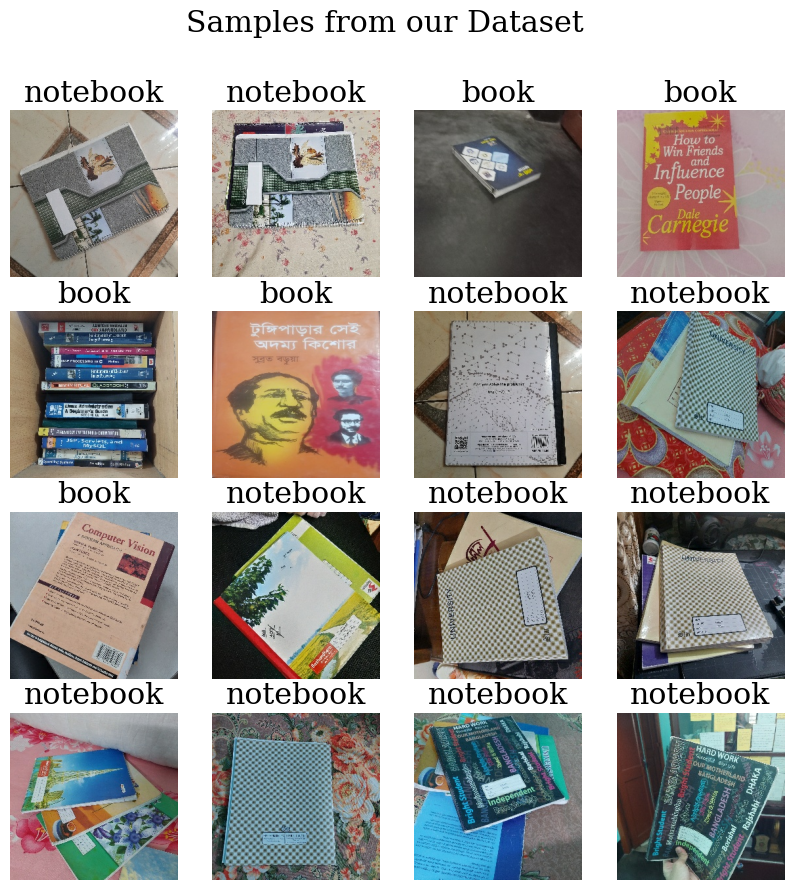

In [6]:
for imgs, labels in train_ds:
  break

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '18'


plt.figure(figsize=(10, 10))
plt.suptitle('Samples from our Dataset')
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(imgs[i] / 255)
  plt.axis('off')
  plt.title(class_names[labels[i]])
plt.show();

# Fully Connected Network

### Create the Model and View Summary

In [3]:
inputs = Input(shape=image_size + (3,))
x = Flatten()(inputs)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

fc_model = keras.Model(inputs, outputs, name='FC_Model')
fc_model.summary()

2024-03-16 08:47:49.114819: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-16 08:47:49.476848: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-16 08:47:49.477293: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "FC_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 256)               50331904  
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 128)               165

### Compile and Fit the model

In [7]:
fc_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy(name='accuracy')]
)

history = fc_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[
        ModelCheckpoint('fc_model.keras', save_weights_only=False, save_best_only=True, verbose=1),
    ],
)

Epoch 1/500


2024-03-16 08:48:14.886449: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5c054de860 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-16 08:48:14.886474: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-03-16 08:48:14.911580: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-16 08:48:14.957147: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1710557295.020395  352310 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 [==============================] - ETA: 0s - loss: 19.0051 - accuracy: 0.5320
Epoch 1: val_loss improved from inf to 5.18574, saving model to fc_model.keras
25/25 [==============================] - 11s 365ms/step - loss: 19.0051 - accuracy: 0.5320 - val_loss: 5.1857 - val_accuracy: 0.5189
Epoch 2/500
24/25 [===========================>..] - ETA: 0s - loss: 3.0853 - accuracy: 0.6341
Epoch 2: val_loss improved from 5.18574 to 1.98874, saving model to fc_model.keras
25/25 [==============================] - 25s 1s/step - loss: 3.0565 - accuracy: 0.6355 - val_loss: 1.9887 - val_accuracy: 0.6038
Epoch 3/500
22/25 [=========================>....] - ETA: 0s - loss: 1.7248 - accuracy: 0.6847
Epoch 3: val_loss improved from 1.98874 to 1.49423, saving model to fc_model.keras
25/25 [==============================] - 27s 1s/step - loss: 1.6769 - accuracy: 0.6931 - val_loss: 1.4942 - val_accuracy: 0.6604
Epoch 4/500
22/25 [=========================>....] - ETA: 0s - loss: 2.2162 - accuracy: 0.

KeyboardInterrupt: 

### Plotting the loss and accuracy curves

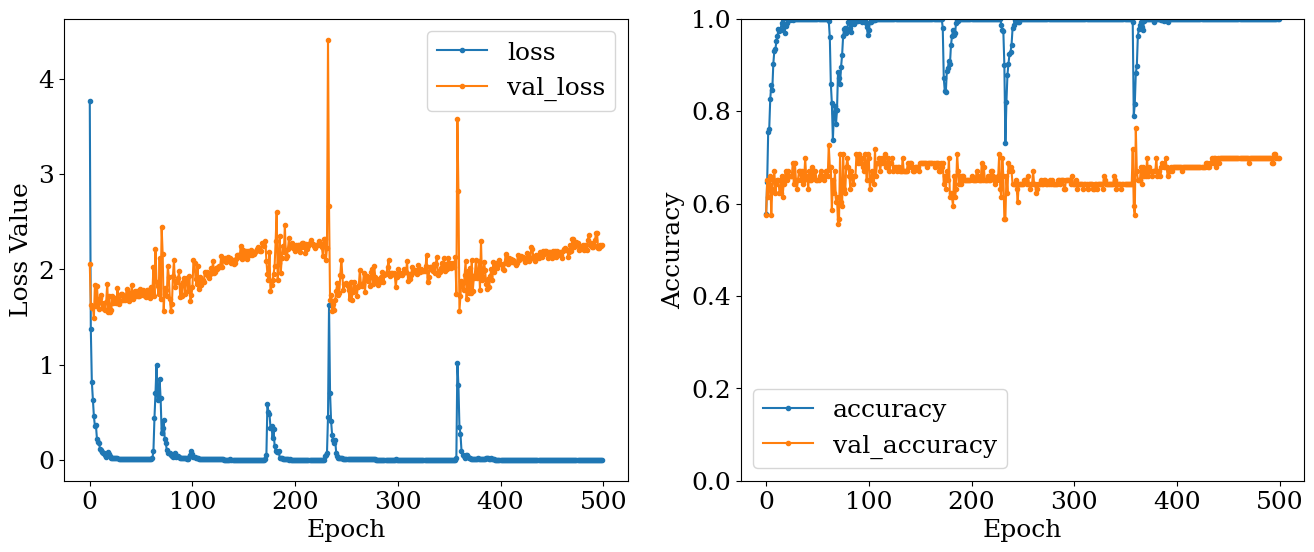

In [114]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], '.-')
plt.plot(history.history['val_loss'], '.-')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '.-')
plt.plot(history.history['val_accuracy'], '.-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(['accuracy', 'val_accuracy'])

plt.show()

### Loading the best checkpoint and evaluating model using the test dataset

In [115]:
fc_model = keras.models.load_model('fc_model.keras')

fc_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[
        BinaryAccuracy(name='accuracy'),
        Precision(name='precision'),
        Recall(name='recall'),
        F1Score(name='f1score'),
    ]
)

eval = fc_model.evaluate(test_ds, return_dict=True)

eval

5/5 [==============================] - 0s 4ms/step - loss: 1.4714 - accuracy: 0.6562 - precision: 0.6517 - recall: 0.7073 - f1score: 0.6777        


{'loss': 1.4714447259902954,
 'accuracy': 0.65625,
 'precision': 0.6516854166984558,
 'recall': 0.707317054271698,
 'f1score': array([0.6776859], dtype=float32)}

# Simple CNN

### Create the Simple CNN Model and View Summary

In [9]:
inputs = Input(shape=image_size + (3,))
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

scnn_model = keras.Model(inputs, outputs, name='SCNN_Model')
scnn_model.summary()

Model: "SCNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 128, 128, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 128)     147584    
                                                        

### Compile and Fit the model

In [10]:
scnn_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy(name='accuracy')]
)

history = scnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[
        ModelCheckpoint('scnn_model.keras', save_weights_only=False, save_best_only=True, verbose=1),
    ],
)

Epoch 1/500


2024-03-16 08:52:12.371130: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-16 08:52:21.112972: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.20GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-16 08:52:21.397802: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.20GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-16 08:52:25.138134: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but t

24/25 [===========================>..] - ETA: 0s - loss: 0.6776 - accuracy: 0.5964

2024-03-16 08:52:38.641631: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.13GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-16 08:52:38.789902: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.13GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-16 08:52:40.409078: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-16 08:52:40.587748: W external/local_tsl/tsl/framework/bfc_

25/25 [==============================] - ETA: 0s - loss: 0.6768 - accuracy: 0.5985
Epoch 1: val_loss improved from inf to 0.69694, saving model to scnn_model.keras
25/25 [==============================] - 34s 594ms/step - loss: 0.6768 - accuracy: 0.5985 - val_loss: 0.6969 - val_accuracy: 0.5472
Epoch 2/500
25/25 [==============================] - ETA: 0s - loss: 0.6004 - accuracy: 0.7084
Epoch 2: val_loss improved from 0.69694 to 0.68265, saving model to scnn_model.keras
25/25 [==============================] - 8s 328ms/step - loss: 0.6004 - accuracy: 0.7084 - val_loss: 0.6827 - val_accuracy: 0.5755
Epoch 3/500
25/25 [==============================] - ETA: 0s - loss: 0.5230 - accuracy: 0.7647
Epoch 3: val_loss did not improve from 0.68265
25/25 [==============================] - 5s 205ms/step - loss: 0.5230 - accuracy: 0.7647 - val_loss: 0.7580 - val_accuracy: 0.5566
Epoch 4/500
25/25 [==============================] - ETA: 0s - loss: 0.4832 - accuracy: 0.7788
Epoch 4: val_loss did not

KeyboardInterrupt: 

### Plotting the loss and accuracy curves

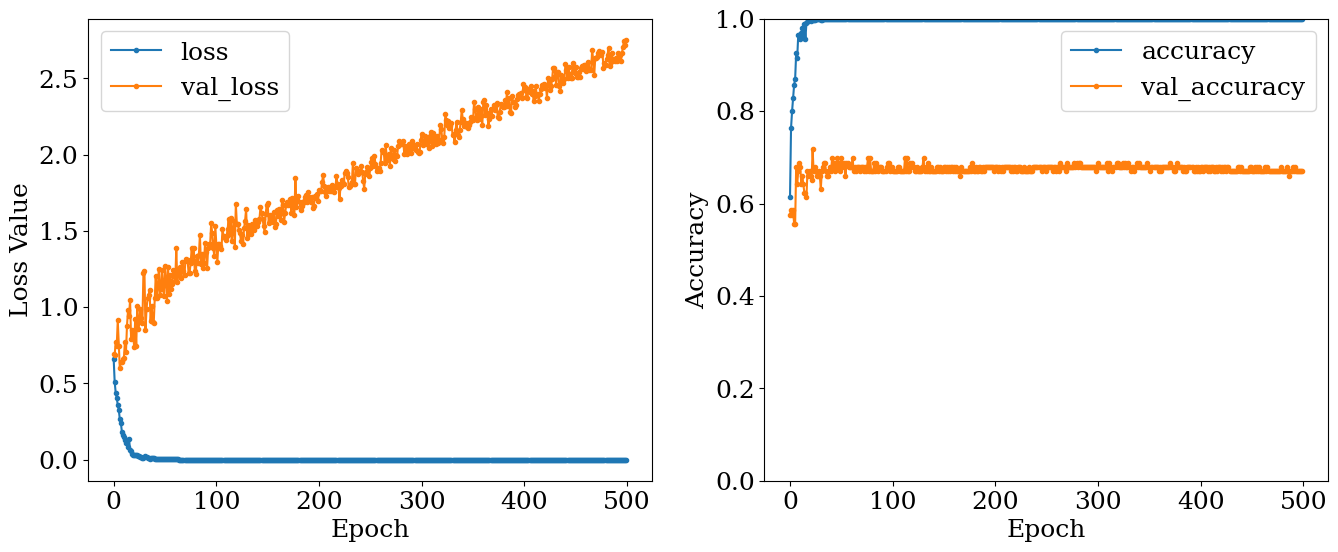

In [118]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], '.-')
plt.plot(history.history['val_loss'], '.-')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '.-')
plt.plot(history.history['val_accuracy'], '.-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(['accuracy', 'val_accuracy'])

plt.show()

### Loading the best checkpoint and evaluating using the test dataset

In [11]:
scnn_model = keras.models.load_model('scnn_model.keras')

scnn_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[
        BinaryAccuracy(name='accuracy'),
        Precision(name='precision'),
        Recall(name='recall'),
        F1Score(name='f1score'),
    ]
)

eval = scnn_model.evaluate(test_ds, return_dict=True)

eval

5/5 [==============================] - 1s 95ms/step - loss: 0.6350 - accuracy: 0.6687 - precision: 0.7101 - recall: 0.5976 - f1score: 0.6777    


{'loss': 0.6350497007369995,
 'accuracy': 0.668749988079071,
 'precision': 0.7101449370384216,
 'recall': 0.5975610017776489,
 'f1score': array([0.6776859], dtype=float32)}

# VGG16 Model With Randomlly Initialized Weights

### Creating the VGG16 Model and Viewing its Summary

In [ ]:
vgg16_model = vgg16.VGG16(include_top=False, weights=None, input_shape=image_size+(3,))

inputs = vgg16_model.input
x = Flatten()(vgg16_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

vgg16_model = keras.Model(inputs, outputs, name='VGG16_Model')
vgg16_model.summary()

Model: "VGG16_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         

### Compile and Fit the Model

In [ ]:
vgg16_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy(name='accuracy')]
)

history = vgg16_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[
        ModelCheckpoint('vgg16_model-noTL.keras', save_weights_only=False, save_best_only=True, verbose=1),
    ],
)

Epoch 1/30
25/25 [==============================] - ETA: 0s - loss: 0.6981 - accuracy: 0.5281
Epoch 1: val_loss improved from inf to 0.69028, saving model to vgg16_model-noTL.keras
25/25 [==============================] - 4s 38ms/step - loss: 0.6981 - accuracy: 0.5281 - val_loss: 0.6903 - val_accuracy: 0.5849
Epoch 2/30
25/25 [==============================] - ETA: 0s - loss: 0.6816 - accuracy: 0.5460
Epoch 2: val_loss did not improve from 0.69028
25/25 [==============================] - 0s 16ms/step - loss: 0.6816 - accuracy: 0.5460 - val_loss: 0.7042 - val_accuracy: 0.4811
Epoch 3/30
24/25 [===========================>..] - ETA: 0s - loss: 0.6699 - accuracy: 0.5651
Epoch 3: val_loss improved from 0.69028 to 0.66353, saving model to vgg16_model-noTL.keras
25/25 [==============================] - 1s 31ms/step - loss: 0.6697 - accuracy: 0.5665 - val_loss: 0.6635 - val_accuracy: 0.5660
Epoch 4/30
25/25 [==============================] - ETA: 0s - loss: 0.6043 - accuracy: 0.6650
Epoch 4: 

### Plotting the loss and accuracy graphs

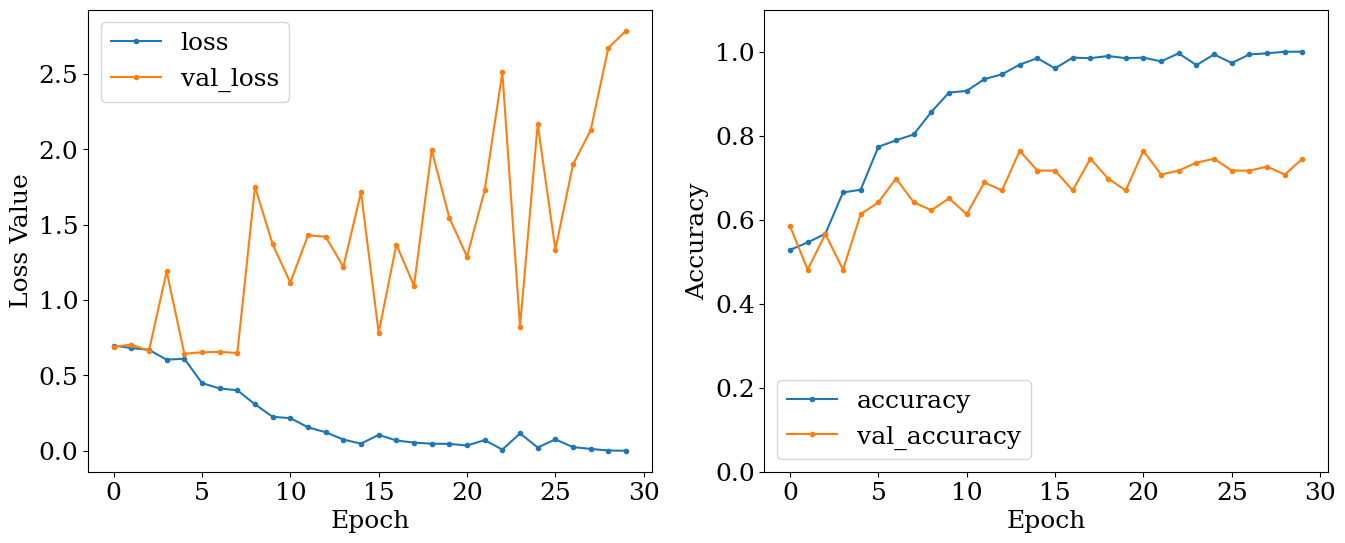

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], '.-')
plt.plot(history.history['val_loss'], '.-')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], '.-')
plt.plot(history.history['val_accuracy'], '.-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.1])
plt.legend(['accuracy', 'val_accuracy'])

plt.show()

### Loading the best checkpoint and evaluating the model using the test dataset

In [ ]:
vgg16_model = keras.models.load_model('vgg16_model-noTL.keras')

vgg16_model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss=BinaryCrossentropy(),
    metrics=[
        BinaryAccuracy(name='accuracy'),
        Precision(name='precision'),
        Recall(name='recall'),
        F1Score(name='f1score'),
    ]
)

eval = vgg16_model.evaluate(test_ds, return_dict=True)

eval

5/5 [==============================] - 0s 11ms/step - loss: 0.6172 - accuracy: 0.6438 - precision: 0.7273 - recall: 0.4878 - f1score: 0.6777       


{'loss': 0.6172350645065308,
 'accuracy': 0.643750011920929,
 'precision': 0.7272727489471436,
 'recall': 0.4878048896789551,
 'f1score': array([0.6776859], dtype=float32)}

# Result Analysis

Gathering all the test labels inside a list

In [ ]:
labels = []
for x, y in test_ds:
    labels.extend(y.numpy().tolist())
# print(labels)

## Confusion Matrices

### Confusion Matrix for FCNN model predictions

In [ ]:
fcnn_predictions = fc_model.predict(test_ds)
fcnn_predictions = (fcnn_predictions > 0.5).astype(np.uint8)
fcnn_predictions = fcnn_predictions.reshape(160,).tolist()

5/5 [==============================] - 0s 12ms/step


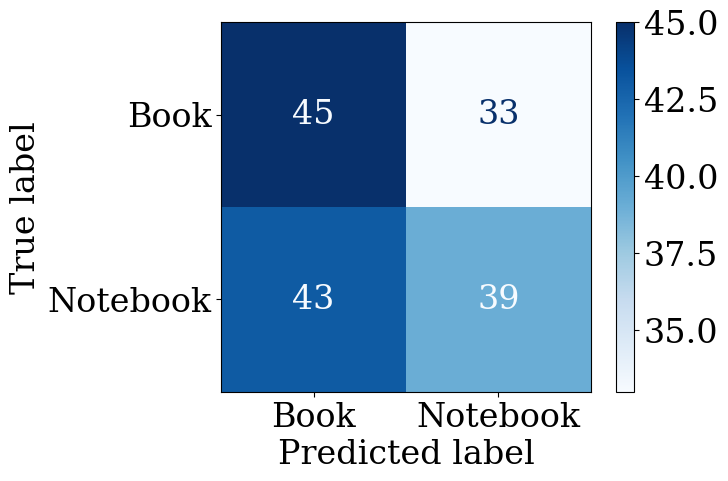

In [ ]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '24'

conf_matrix = confusion_matrix(labels, fcnn_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Book', 'Notebook'])
disp.plot(cmap='Blues', values_format='d')


plt.show()

In [ ]:
conf_matrix

array([[63, 15],
       [42, 40]])

### Confusion matrix for FCNN model predictions

In [ ]:
scnn_predictions = scnn_model.predict(test_ds)
scnn_predictions = (scnn_predictions > 0.5).astype(np.uint8)
scnn_predictions = scnn_predictions.reshape(160,).tolist()

5/5 [==============================] - 0s 5ms/step


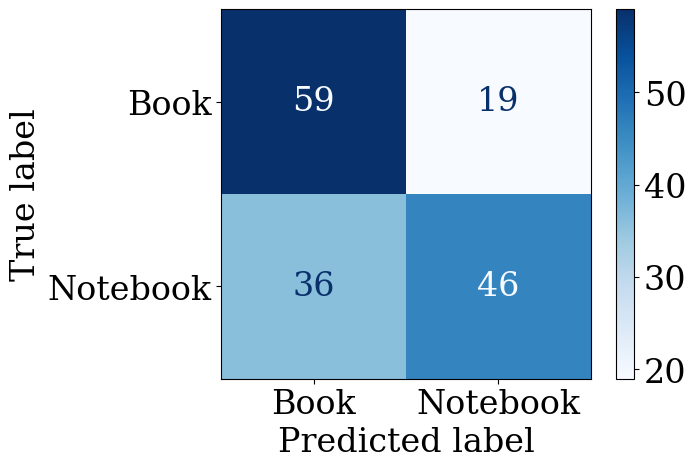

In [ ]:
conf_matrix = confusion_matrix(labels, scnn_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Book', 'Notebook'])
disp.plot(cmap='Blues', values_format='d')


plt.show()

### Confusion matrix for VGG16 model predictions

In [ ]:
vgg16_predictions = vgg16_model.predict(test_ds)
vgg16_predictions = (vgg16_predictions > 0.5).astype(np.uint8)
vgg16_predictions = vgg16_predictions.reshape(160,).tolist()

1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 4ms/step


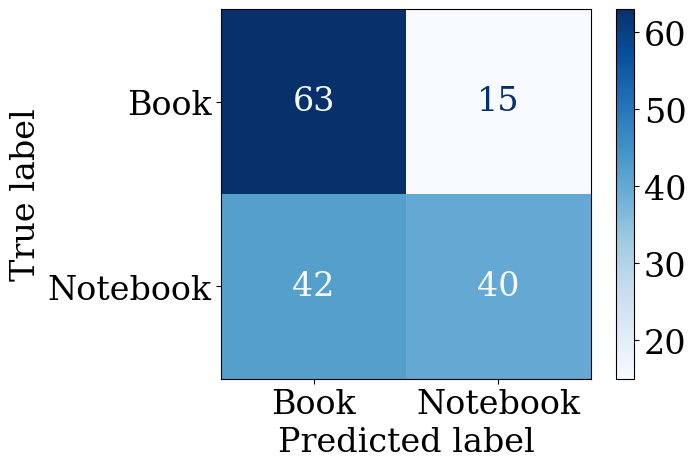

In [ ]:
conf_matrix = confusion_matrix(labels, vgg16_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Book', 'Notebook'])
disp.plot(cmap='Blues', values_format='d')
plt.show()